In [17]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import os

In [3]:
df = pd.read_csv("../data/processed/gladiador_data_procesado.csv")
df.head()

,Wins,Public Favor,Survived,Allegiance Network_Strong
0,11,0.841842,False,1
1,7,0.651044,True,0
2,6,0.593816,True,1
3,6,0.540815,False,1
4,12,0.761651,False,1


In [6]:
df['Survived'] = df['Survived'].astype(int)
df.head()

,Wins,Public Favor,Survived,Allegiance Network_Strong
0,11,0.841842,0,1
1,7,0.651044,1,0
2,6,0.593816,1,1
3,6,0.540815,0,1
4,12,0.761651,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wins                       9976 non-null   int64  
 1   Public Favor               9976 non-null   float64
 2   Survived                   9976 non-null   int64  
 3   Allegiance Network_Strong  9976 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 311.9 KB


## MODELO KMEANS

In [4]:
X = df[['Wins', 'Public Favor', 'Survived', 'Allegiance Network_Strong']]
print(X.shape)

(9976, 4)


In [5]:
#Escalado de Características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Convierto el array escalado de nuevo a un DataFrame para mantener los nombres de las columnas
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\nPrimeras 5 filas de X_scaled_df (después del escalado):")
print(X_scaled_df.head())


Primeras 5 filas de X_scaled_df (después del escalado):
       Wins  Public Favor  Survived  Allegiance Network_Strong
0  0.899414      1.041621 -0.985273                   0.728053
1 -0.240682     -0.327023  1.014947                  -1.373526
2 -0.525706     -0.737534  1.014947                   0.728053
3 -0.525706     -1.117726 -0.985273                   0.728053
4  1.184439      0.466394 -0.985273                   0.728053


In [7]:
K= 2
km_model =KMeans(n_clusters=K, n_init=10, random_state=10).fit(X_scaled_df)
km_model.labels_

array([0, 1, 0, ..., 0, 0, 1], dtype=int32)

In [8]:
#Obtengo las etiquetas de clúster asignadas a cada punto de datos
cluster_labels = km_model.labels_
print(f"\nPrimeras 10 etiquetas de clúster asignadas: {cluster_labels[:10]}")


Primeras 10 etiquetas de clúster asignadas: [0 1 0 1 0 0 1 1 1 0]


In [9]:
#Añado las etiquetas de clúster al DataFrame original para análisis
df['Cluster'] = cluster_labels
print("\nDataFrame con la columna 'Cluster' añadida:")
print(df.head())


DataFrame con la columna 'Cluster' añadida:
   Wins  Public Favor  Survived  Allegiance Network_Strong  Cluster
0    11      0.841842     False                          1        0
1     7      0.651044      True                          0        1
2     6      0.593816      True                          1        0
3     6      0.540815     False                          1        1
4    12      0.761651     False                          1        0


In [10]:
#Evaluación del Clustering 

#Distribución de los Clústeres
print("\nDistribución de puntos por clúster:")
print(df['Cluster'].value_counts())


Distribución de puntos por clúster:
Cluster
0    5500
1    4476
Name: count, dtype: int64


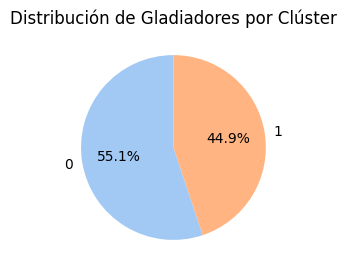

Gráfico de pastel de la distribución de clústeres generado.


In [19]:
#Visualización de la distribución de clústeres con un gráfico de pastel
plt.figure(figsize=(3, 3))
df['Cluster'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribución de Gladiadores por Clúster')
plt.ylabel('') 
plt.show()
print("Gráfico de pastel de la distribución de clústeres generado.")

In [12]:
#Coeficiente de Silueta
#El Coeficiente de Silueta mide cuán similar es un objeto a su propio clúster (cohesión) en comparación con otros clústeres (separación).
#Un valor cercano a 1 indica que el objeto está bien agrupado.
#Un valor cercano a 0 indica que el objeto está entre dos clústeres.
#Un valor cercano a -1 indica que el objeto ha sido asignado al clúster incorrecto.
try:
    silhouette_avg = silhouette_score(X_scaled_df, cluster_labels)
    print(f"\nCoeficiente de Silueta promedio: {silhouette_avg:.4f}")
except Exception as e:
    print(f"\nError al calcular el Coeficiente de Silueta: {e}")
    print("Asegúrate de que hay al menos 2 clústeres y más de 1 muestra.")


Coeficiente de Silueta promedio: 0.4329


In [13]:
#Interpretación de los Clústeres
#Analizo las características promedio de cada clúster para entender qué representan
print("\nCaracterísticas promedio por Clúster:")
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)


Características promedio por Clúster:
             Wins  Public Favor  Survived  Allegiance Network_Strong
Cluster                                                             
0        9.842545      0.791949  0.747636                   0.993091
1        5.389187      0.579511  0.179178                   0.236372


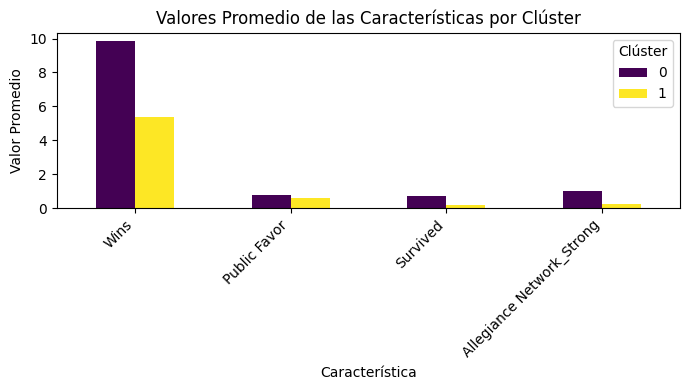

Gráfico de barras de características promedio por clúster generado.


In [21]:
#Visualización de las características promedio por clúster
cluster_means.T.plot(kind='bar', figsize=(7, 4), colormap='viridis')
plt.title('Valores Promedio de las Características por Clúster')
plt.xlabel('Característica')
plt.ylabel('Valor Promedio')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Clúster')
plt.tight_layout()
plt.show()
print("Gráfico de barras de características promedio por clúster generado.")

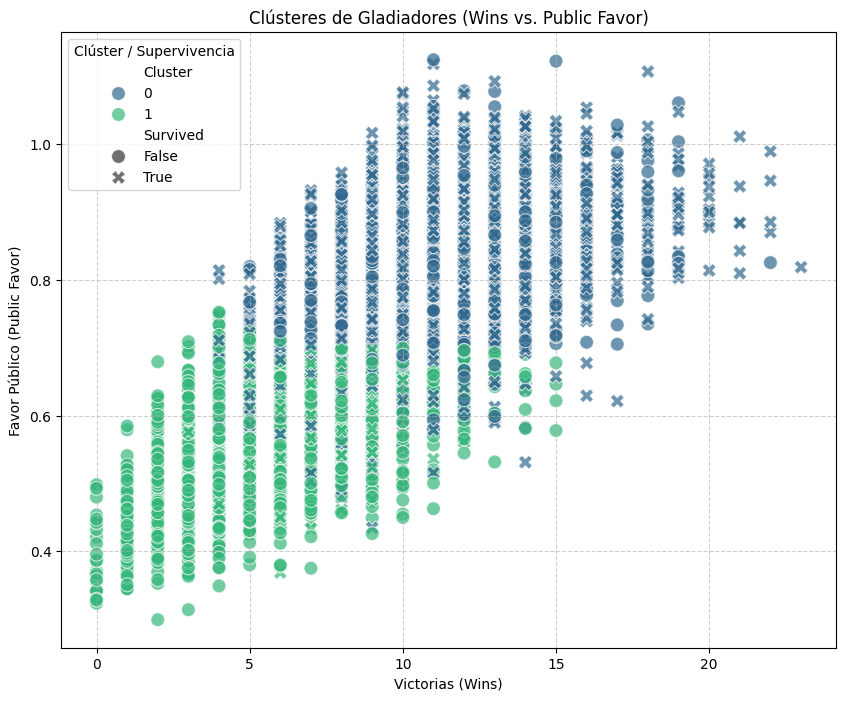

Gráfico de dispersión de clústeres generado.


In [15]:
#Visualización de los Clústeres en 2D 
# Visualizamos los clústeres usando 'Wins' y 'Public Favor' como ejes, ya que son las características continuas principales.
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Wins',
    y='Public Favor',
    hue='Cluster', # Colorea los puntos según el clúster asignado
    style='Survived', # Usa un estilo diferente para 'Survived' (True/False)
    data=df,
    palette='viridis',
    s=100, # Tamaño de los puntos
    alpha=0.7 # Transparencia
)

plt.title('Clústeres de Gladiadores (Wins vs. Public Favor)')
plt.xlabel('Victorias (Wins)')
plt.ylabel('Favor Público (Public Favor)')
plt.legend(title='Clúster / Supervivencia')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
print("Gráfico de dispersión de clústeres generado.")

In [18]:
#Guardar el Modelo K-Means y el Escalador
# Guardar el modelo K-Means y el escalador para poder usarlos posteriormente.
output_directory = '../models'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

kmeans_model_filename = os.path.join(output_directory, 'kmeans_model.pkl')
scaler_filename = os.path.join(output_directory, 'scaler_kmeans.pkl') # Nombre diferente para el escalador de K-Means

try:
    with open(kmeans_model_filename, 'wb') as file:
        pickle.dump(km_model, file)
    print(f"\nModelo K-Means guardado exitosamente en: {kmeans_model_filename}")

    with open(scaler_filename, 'wb') as file:
        pickle.dump(scaler, file)
    print(f"Escalador para K-Means guardado exitosamente en: {scaler_filename}")

except Exception as e:
    print(f"Error al guardar el modelo K-Means o el escalador: {e}")

print("\n--- Entrenamiento y Evaluación del Modelo K-Means Completados ---")


Modelo K-Means guardado exitosamente en: ../models\kmeans_model.pkl
Escalador para K-Means guardado exitosamente en: ../models\scaler_kmeans.pkl

--- Entrenamiento y Evaluación del Modelo K-Means Completados ---
